In [90]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [91]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv("diabetes.csv")
df_diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EXPLORACIÓN DE DATOS

In [92]:
#Visualizacion del dataframe
df_diabetes.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
592,3,132,80,0,0,34.4,0.402,44,1
630,7,114,64,0,0,27.4,0.732,34,1
31,3,158,76,36,245,31.6,0.851,28,1
383,1,90,62,18,59,25.1,1.268,25,0
444,4,117,62,12,0,29.7,0.380,30,1
148,5,147,78,0,0,33.7,0.218,65,0
746,1,147,94,41,0,49.3,0.358,27,1
129,0,105,84,0,0,27.9,0.741,62,1
516,9,145,88,34,165,30.3,0.771,53,1
92,7,81,78,40,48,46.7,0.261,42,0


In [93]:
#RENOMBRAMOS LAS COLUMNAS

df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']
df_diabetes.head(5)

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [94]:
#Analizamos el shape del objeto
print(df_diabetes.shape)

(768, 9)


In [95]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

## ENTRENAMIENTO DEL MODELO

In [96]:
#Ceparamos  X Y
X=df_diabetes.drop("9. Class variable (0 or 1)", axis=1)
Y=df_diabetes["9. Class variable (0 or 1)"]

In [97]:
# Importamos las librerias para generar el modelo
from sklearn.model_selection import train_test_split
#Distribucion de datos de entrenamiento y test 30% Y 70%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=00000)


In [98]:
#Importamos el algoritmo de arbol de decisiones
from sklearn.ensemble import RandomForestClassifier
#Creamos el modelo
random_forest=RandomForestClassifier(n_estimators=6, random_state=00000)

In [99]:
#Entrenamiento del modelo
random_forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=6, random_state=0)

In [100]:
#Calculamos las prediciones
Y_train_pred=random_forest.predict(X_train)
Y_test_pred=random_forest.predict(X_test)

## EVALUACION DEL MODELO

In [101]:
#Calculo de metricas
from sklearn.metrics import accuracy_score
#Calculo el accuracy en Train
train_accuracy=accuracy_score(Y_train, Y_train_pred)
#Calculo el accuracy en Train
test_accuracy=accuracy_score(Y_test, Y_test_pred)

print("El Accuracy en train es de: ", train_accuracy)
print("El Accuracy en test es de: ", test_accuracy)

El Accuracy en train es de:  0.9590316573556797
El Accuracy en test es de:  0.7489177489177489


In [102]:
#Verificamos el fature importances
feature_importances_df=pd.DataFrame(
     {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)
#Mostramos
feature_importances_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.260896
7,8. Age (years),0.160902
5,6. Body mass index (weight in kg/(height in m)^2),0.158063
6,7. Diabetes pedigree function,0.116404
3,4. Triceps skin fold thickness (mm),0.096528
4,5. 2-Hour serum insulin (mu U/ml),0.079355
2,3. Diastolic blood pressure (mm Hg),0.065469
0,1. Number of times pregnant,0.062384


/home/dparedes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'),
  Text(1, 0, '8. Age (years)'),
  Text(2, 0, '6. Body mass index (weight in kg/(height in m)^2)'),
  Text(3, 0, '7. Diabetes pedigree function'),
  Text(4, 0, '4. Triceps skin fold thickness (mm)'),
  Text(5, 0, '5. 2-Hour serum insulin (mu U/ml)'),
  Text(6, 0, '3. Diastolic blood pressure (mm Hg)'),
  Text(7, 0, '1. Number of times pregnant')])

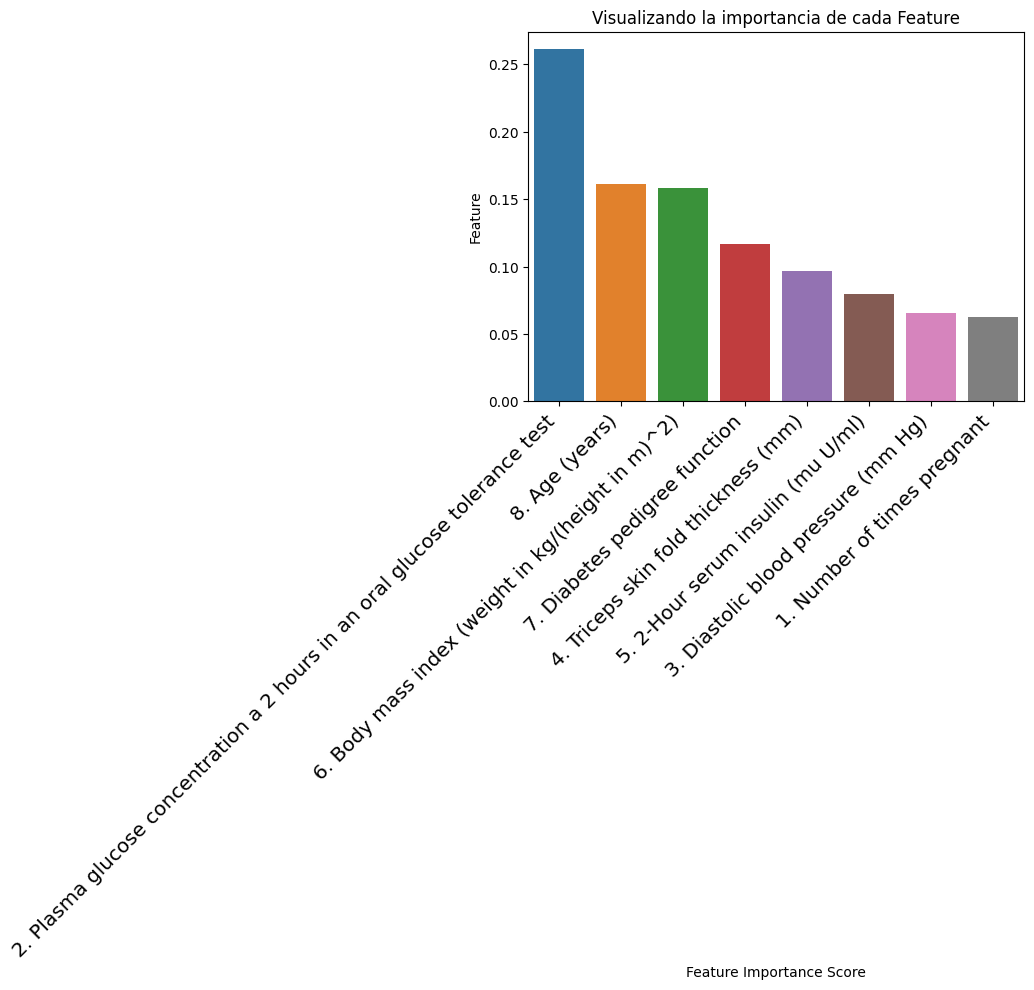

In [103]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")

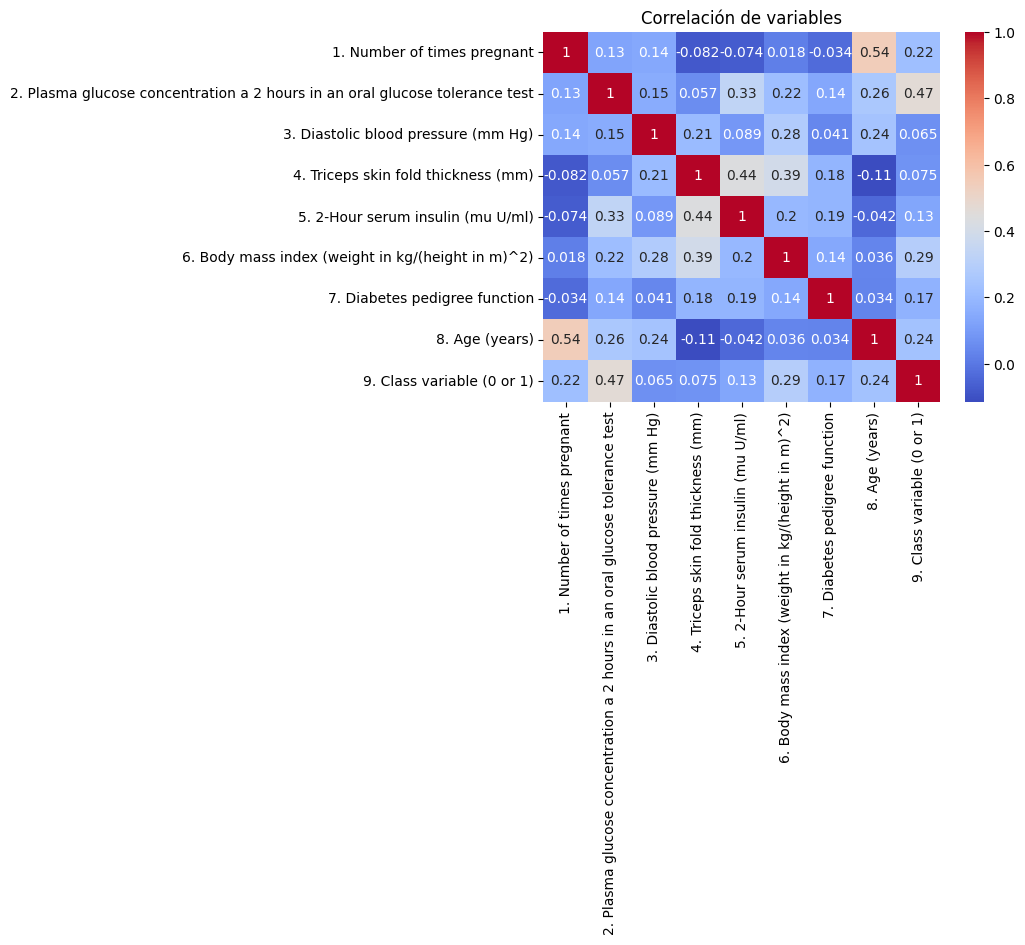

In [105]:
sns.heatmap(df_diabetes.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación de variables')
plt.show()